#### Exercise 13

This particular Automobile Data Set includes a good mix of categorical values as well as continuous values and serves as a useful example that is relatively easy to understand. Since domain understanding is an important aspect when deciding how to encode various categorical values - this data set makes a good case study.

Read the data into Pandas

In [1]:
import pandas as pd

# Define the headers since the data does not have any
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]

# Read in the CSV file and convert "?" to NaN
df = pd.read_csv("http://mlr.cs.umass.edu/ml/machine-learning-databases/autos/imports-85.data",
                  header=None, names=headers, na_values="?" )
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [2]:
df.shape

(205, 26)

In [3]:
df.dtypes

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [4]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [5]:
numeric_df = df.select_dtypes(include=['float64','int64']).copy()
numeric_df.head()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


# Exercise 13.1

Does the database contain missing values? If so, replace them using one of the methods explained in class

**Como se observa en el procedimiento anterior se crearon 2 dataframes uno con las variables categóricas y otro con las variables continuas. Se va a proceder ahora a validar en cada uno de los dataframes si tenemos missing values**

In [6]:
## Dataframe con variables categoricas
obj_df.isnull().sum()

make               0
fuel_type          0
aspiration         0
num_doors          2
body_style         0
drive_wheels       0
engine_location    0
engine_type        0
num_cylinders      0
fuel_system        0
dtype: int64

In [7]:
## hay 2 registros que tienen missing values en el número de puertas y el valor que más se repite
## es cuatro para el numero de puertas

obj_df.num_doors.value_counts()

four    114
two      89
Name: num_doors, dtype: int64

In [7]:
## Entonces asignamos los valores faltantes en la categoria que más se repite
obj_df['num_doors']= obj_df['num_doors'].fillna(obj_df['num_doors'].mode()[0])

**Los 2 registros faltantes con número de puertas se les asignó a la categoría 'four'**

In [8]:
obj_df.num_doors.value_counts()

four    116
two      89
Name: num_doors, dtype: int64

In [8]:
## Dataframe con variables continuas

numeric_df.isnull().sum()

symboling             0
normalized_losses    41
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_size           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

*Dentro de las variables continuas se observa que tenemos 6 variales con valores faltantes pero aquella con más registros es 'normalized_losses, por lo que vamos a revisar sus valores mínimo, máximo, media y mediana  para tener una idea de cómo se distribuye*

In [14]:
print('Maximo ',numeric_df.normalized_losses.max())
print('Mediana ',numeric_df.normalized_losses.median())

print('Media ',numeric_df.normalized_losses.mean())
print('Mínimo ',numeric_df.normalized_losses.min())

Maximo  256.0
Mediana  115.0
Media  122.0
Mínimo  65.0


**Los valores para esta variable no están tan dispersos, revisar las otras variables con boxplots**


In [16]:
import matplotlib.pyplot as plt

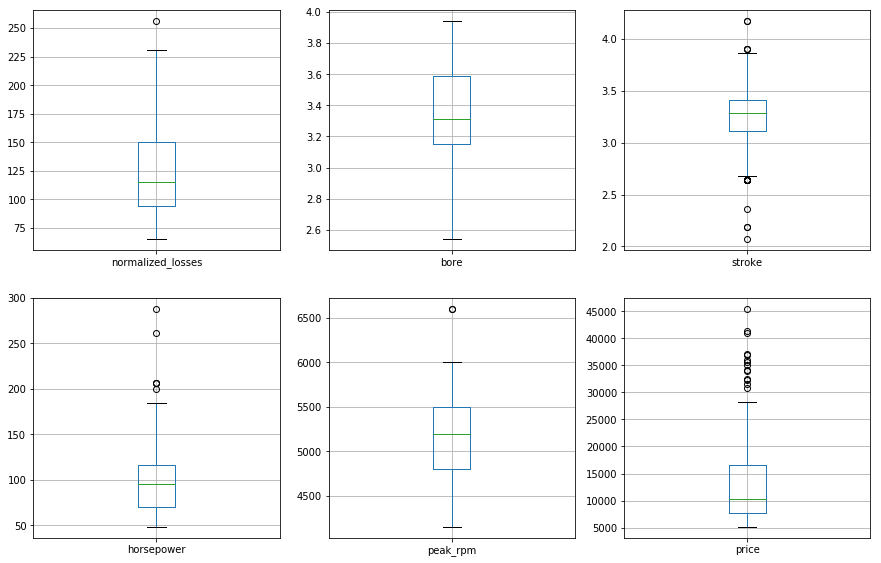

In [22]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

ax1 = fig.add_subplot(3,3,1)
ax1 = numeric_df.boxplot(['normalized_losses'])
ax2 = fig.add_subplot(3,3,2)
ax2 = numeric_df.boxplot(['bore'])
ax3 = fig.add_subplot(3,3,3)
ax3 = numeric_df.boxplot(['stroke'])
ax4 = fig.add_subplot(3,3,4)
ax4 = numeric_df.boxplot(['horsepower'])
ax5 = fig.add_subplot(3,3,5)
ax5 = numeric_df.boxplot(['peak_rpm'])
ax6 = fig.add_subplot(3,3,6)
ax6 = numeric_df.boxplot(['price'])
plt.show()


**Tenemos entonces que la variables con más registros nulos se va a reemplazar con la mediana y para el resto de variables como son tan pocos registros nulos, y aunque tienen algo más de dispersión y datos atípicos como el precio se deja entonces de igual manera la mediana, como valor a asignar**

In [25]:
for i in ['normalized_losses','bore','stroke','horsepower','peak_rpm','price']:
       numeric_df[i].fillna(numeric_df[i].median(), inplace = True) 

In [26]:
# Valores a reemplazar
numeric_df.isnull().sum()

symboling            0
normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [27]:
numeric_df.head()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,115.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


# Exercise 13.2

Split the data into training and testing sets

Train a Random Forest Regressor to predict the price of a car using the nominal features

**Usando las variables continuas y con los parámetros que se consideran eficientes para el Random Forest, clasificamos:**

In [28]:
y = numeric_df['price']
x = numeric_df.drop(['price'], axis=1)

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)
## Estandarizamos los valores de las variables continuas
scaler  =  StandardScaler ()

X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform (X_test)

clf = RandomForestRegressor(n_estimators=100,max_depth=6,max_features='sqrt', random_state=1)
clf.fit(X_train_s,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [39]:
y_pred = R_For.predict(X_test_s)

In [63]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


MAE: 1504.586230585219
MSE: 5967189.462661666
RMSE: 2442.783138688669


# Exercise 13.3

Create dummy variables for the categorical features

Train a Random Forest Regressor and compare

**A las variables continuas del paso anterior le vamos a adjuntar las dummies de las variables nominales**

In [48]:
Xdummies = pd.get_dummies(obj_df)
Xnew = pd.concat([Xdummies,x], axis=1)

In [49]:
Xnew.head()

,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,...,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
0,1,0,0,0,0,0,0,0,0,0,...,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27
1,1,0,0,0,0,0,0,0,0,0,...,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27
2,1,0,0,0,0,0,0,0,0,0,...,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26
3,0,1,0,0,0,0,0,0,0,0,...,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30
4,0,1,0,0,0,0,0,0,0,0,...,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22


In [52]:
X_train, X_test, y_train, y_test = train_test_split(Xnew, y, test_size=0.30, random_state=1)

clf3 = RandomForestRegressor(n_estimators=100,max_depth=8,max_features='sqrt', random_state=1)
clf3.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [53]:
y_pred = clf3.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1504.586230585219
MSE: 5967189.462661666
RMSE: 2442.783138688669


**Ingresando las variables como dummies de las categóricas se puede ver el RMSE se reduce respecto al ejercicio anterior**

# Exercise 13.4

Apply two other methods of categorical encoding

compare the results

**Ahora a las variables categoricas se le obtiene una codificación binaria y se le adjunta las variables numéricas. Se ingresa ahora ese dataframe para clasificación**

In [64]:
import category_encoders as ce
Bin = ce.BinaryEncoder()
X_bin = Bin.fit_transform(obj_df, axis=1)  
Xnewb = pd.concat([X_bin,x], axis=1)

X_train, X_test, y_train, y_test = train_test_split(Xnewb, y, test_size=0.30, random_state=1)

clf4 = RandomForestRegressor(n_estimators=100,max_depth=8,max_features='sqrt', random_state=1)
clf4.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [65]:
y_pred = clf4.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1434.7263378288476
MSE: 5523829.112522282
RMSE: 2350.2827728854845


**Con las variables categoricas convertidas a codificación binaria se obtiene un RMSE menor que al ingresar las variables dummies. Se puede concluir entonces que una tranformación acertada me reduce el error de clasificación y por ende se mejora la predición.
En este tipo de algoritmos a mayor número de variables, mejor, porque veíamos que con las variables continuas se obtuvo un RMSE, que se redujo al ingresar las variables categóricas**

*Por:Ana Milena Rodríguez*